In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import geojson
import plotly.express as px
import plotly.io as pio
import json


In [3]:
def load_trips(list):
    df = pd.DataFrame()
    for month in list:
        print(month)
        trips = pq.read_table(f'data/yellow_tripdata_2022-{month:02}.parquet')
        trips_df = trips.to_pandas()
        # Append data
        df = pd.concat((df, trips_df), ignore_index=True)# df.concat(trips_df, ignore_index=True)

    return df
list = range(1,13)
df = load_trips(list)
#df.to_csv('data/yellow_tripdata_combined.csv')
#df = pd.read_csv('data/yellow_tripdata_combined.csv')
print(df.shape)

1
2
3
4
5
6
7
8
9
10
11
12
(39656098, 19)


In [65]:
df["pickup_at"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["dropoff_at"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [74]:
df["duration"] = (df["dropoff_at"] - df["pickup_at"]).dt.total_seconds()

In [76]:
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_at',
       'dropoff_at', 'duration'],
      dtype='object')


In [77]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07,3.719482e+07
mean,1.716506e+00,1.404849e+00,3.503438e+00,1.063300e+00,1.651655e+02,1.629470e+02,1.202234e+00,1.451890e+01,1.056870e+00,4.969327e-01,2.742981e+00,5.277034e-01,3.203803e-01,2.141779e+01,2.336616e+00,9.833158e-02,3.136758e+03
std,4.506943e-01,9.671340e-01,4.401993e+00,3.450310e-01,6.478063e+01,7.005169e+01,4.016660e-01,1.286240e+01,1.268206e+00,4.121386e-02,3.070379e+00,1.961592e+00,1.178289e-01,1.644783e+01,6.178712e-01,3.365195e-01,1.139876e+06
min,1.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.520000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.820000e+00,0.000000e+00,0.000000e+00,-4.305596e+06
25%,1.000000e+00,1.000000e+00,1.130000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.230000e+01,2.500000e+00,0.000000e+00,4.510000e+02
50%,2.000000e+00,1.000000e+00,1.900000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.595000e+01,2.500000e+00,0.000000e+00,7.340000e+02
75%,2.000000e+00,1.000000e+00,3.500000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.600000e+01,2.500000e+00,5.000000e-01,3.360000e+00,0.000000e+00,3.000000e-01,2.256000e+01,2.500000e+00,0.000000e+00,1.181000e+03
max,2.000000e+00,7.000000e+00,5.000000e+01,6.000000e+00,2.650000e+02,2.650000e+02,2.000000e+00,2.000000e+02,3.350000e+01,1.710000e+01,1.000000e+02,9.900000e+01,1.000000e+00,2.993500e+02,2.750000e+00,1.250000e+00,6.193233e+08


In [4]:
df = df.dropna()
print(df.shape)

(38287795, 19)


In [ ]:
df.describe()

<AxesSubplot:>

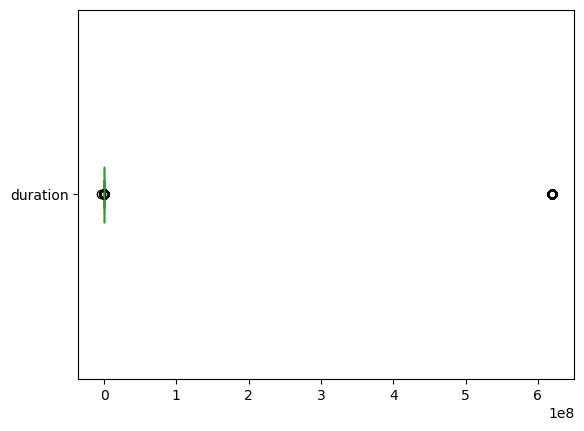

In [78]:
df.boxplot(column=["duration"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["duration"])

<AxesSubplot:title={'center':'duration'}, ylabel='Frequency'>

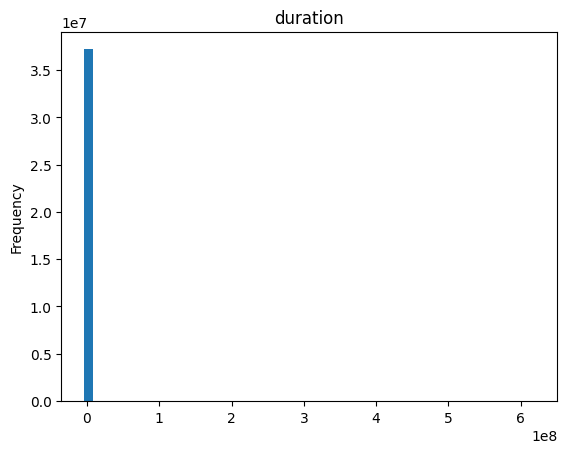

In [79]:
df["duration"].plot(kind="hist", title="duration", xlabel="duration", bins=50)

<AxesSubplot:>

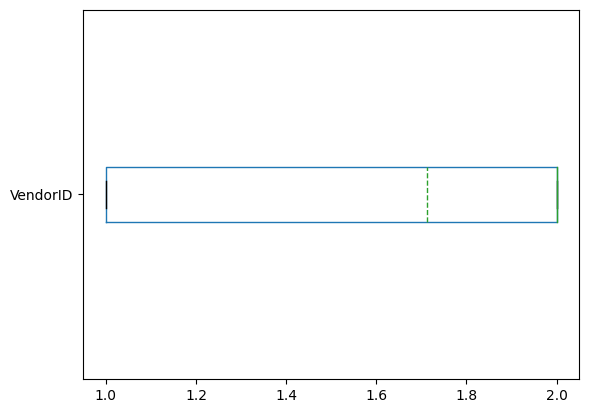

In [43]:
df.boxplot(column=["VendorID"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["VendorID"])

<AxesSubplot:title={'center':'VendorID'}, ylabel='Frequency'>

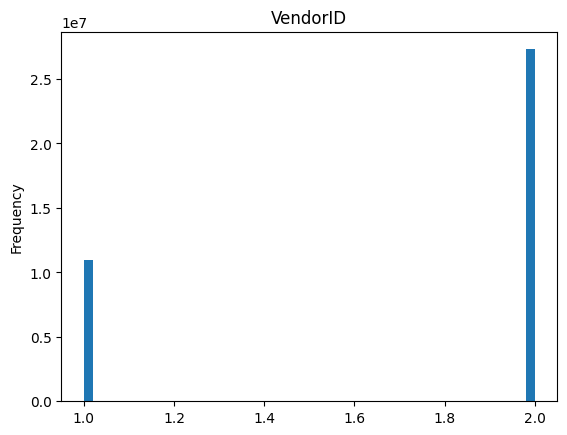

In [44]:
df["VendorID"].plot(kind="hist", title="VendorID", xlabel="VendorID", bins=50)

<AxesSubplot:>

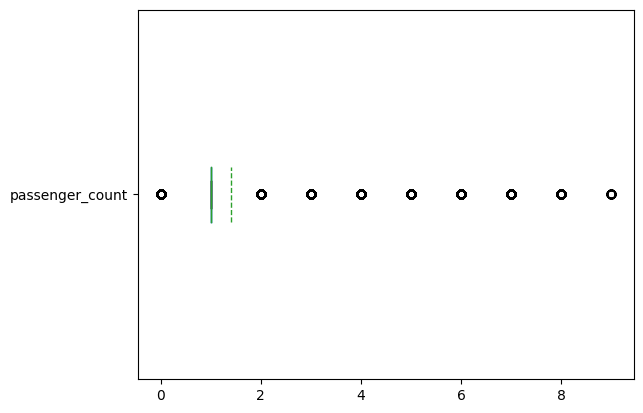

In [45]:
df.boxplot(column=["passenger_count"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["passenger_count"])

<AxesSubplot:title={'center':'passenger_count'}, ylabel='Frequency'>

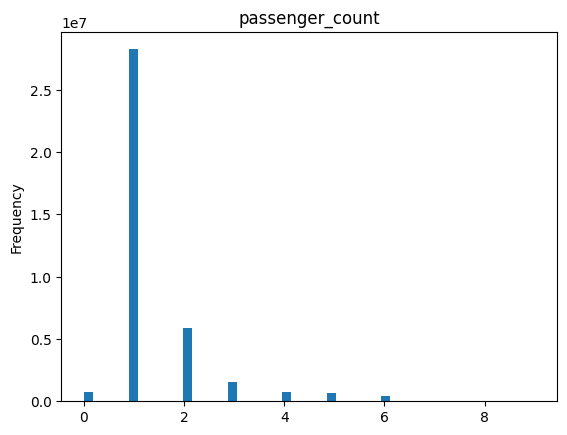

In [46]:
df["passenger_count"].plot(kind="hist", title="passenger_count", xlabel="passenger_count", bins=50)

<AxesSubplot:>

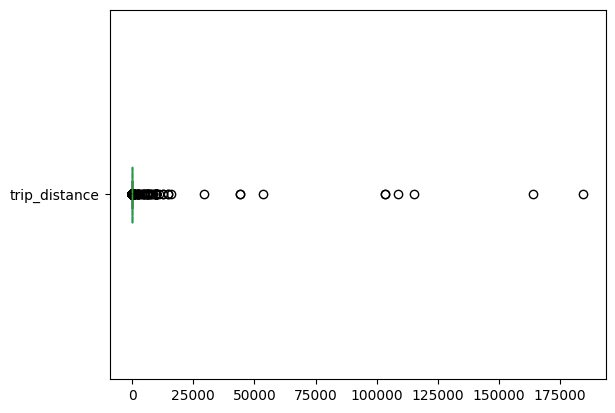

In [47]:
df.boxplot(column=["trip_distance"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["trip_distance"])

<AxesSubplot:title={'center':'trip_distance'}, ylabel='Frequency'>

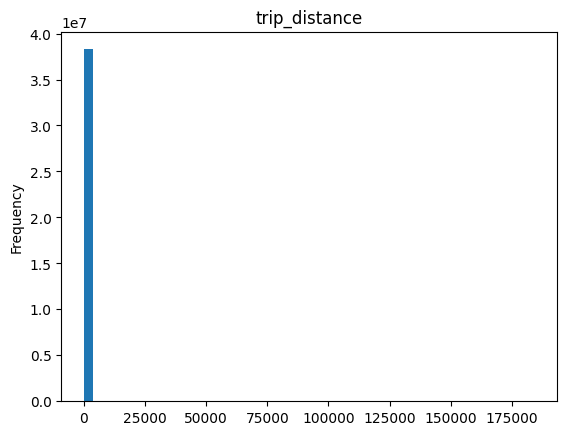

In [48]:
df["trip_distance"].plot(kind="hist", title="trip_distance", xlabel="trip_distance", ylabel="Number of pickups", bins=50)

<AxesSubplot:>

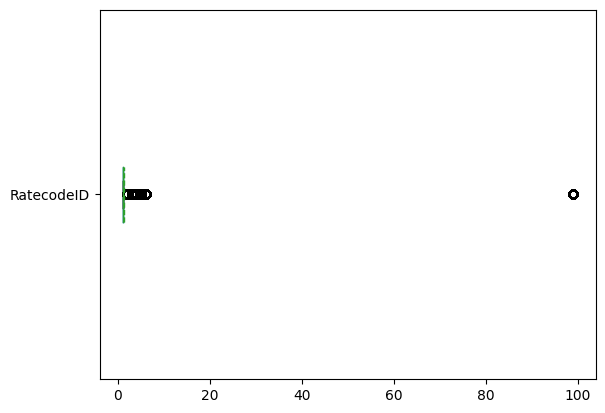

In [49]:
df.boxplot(column=["RatecodeID"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["RatecodeID"])

<AxesSubplot:title={'center':'RatecodeID'}, ylabel='Frequency'>

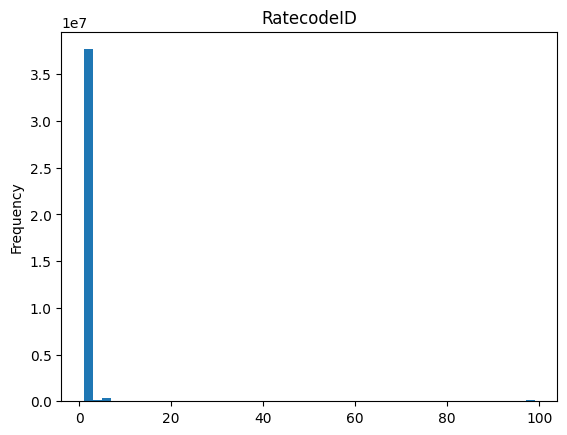

In [50]:
df["RatecodeID"].plot(kind="hist", title="RatecodeID", xlabel="RatecodeID", bins=50)

In [71]:
#df["PULocationID"].plot(kind="bar", title="PULocationID", xlabel="PULocationID")

<AxesSubplot:title={'center':'DOLocationID'}, ylabel='Frequency'>

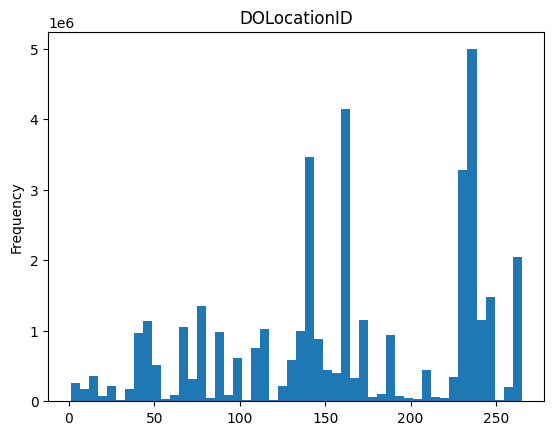

In [ ]:
#df["DOLocationID"].plot(kind="bar", title="DOLocationID", xlabel="DOLocationID")

<AxesSubplot:>

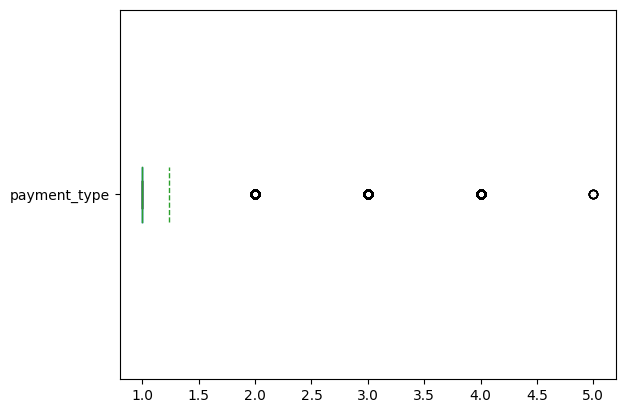

In [55]:
df.boxplot(column=["payment_type"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["payment_type"])

<AxesSubplot:title={'center':'payment_type'}, ylabel='Frequency'>

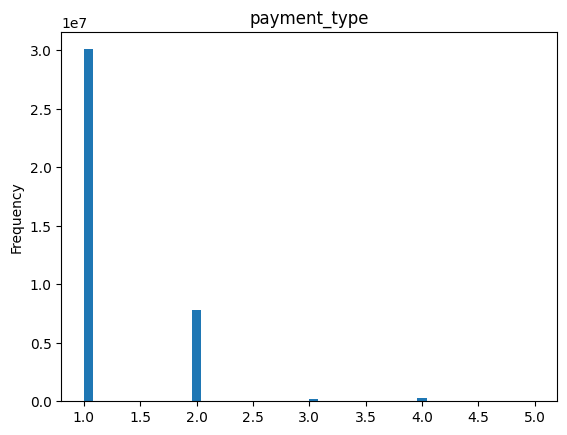

In [56]:
df["payment_type"].plot(kind="hist", title="payment_type", xlabel="payment_type", bins=50)

<AxesSubplot:>

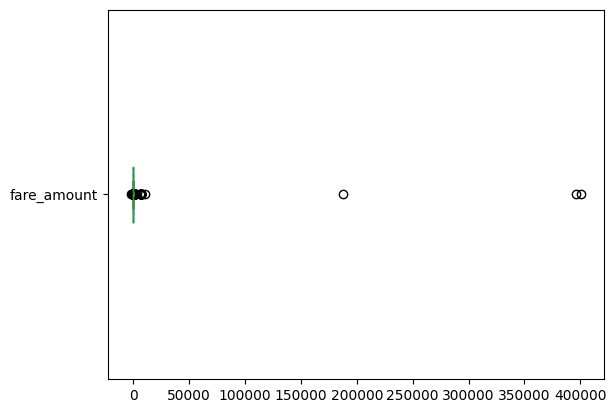

In [57]:
df.boxplot(column=["fare_amount"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["Fare amount"])

<AxesSubplot:title={'center':'fare_amount'}, ylabel='Frequency'>

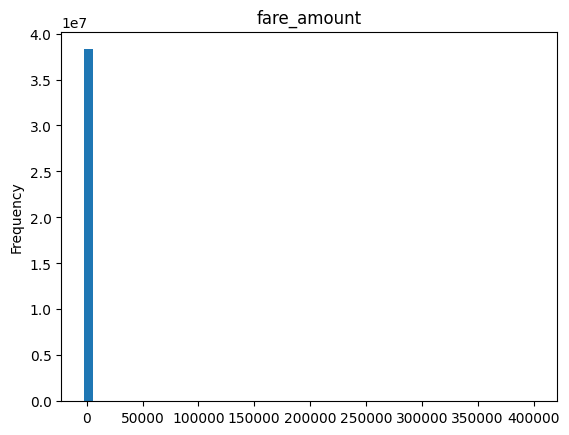

In [58]:
df["fare_amount"].plot(kind="hist", title="fare_amount", xlabel="fare_amount", bins=50)

<AxesSubplot:>

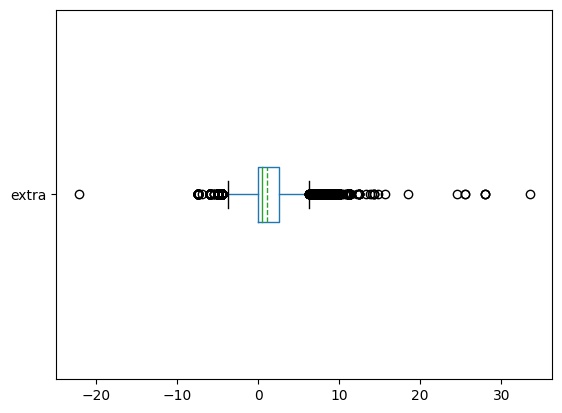

In [59]:
df.boxplot(column=["extra"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["extra"])

<AxesSubplot:title={'center':'extra'}, ylabel='Frequency'>

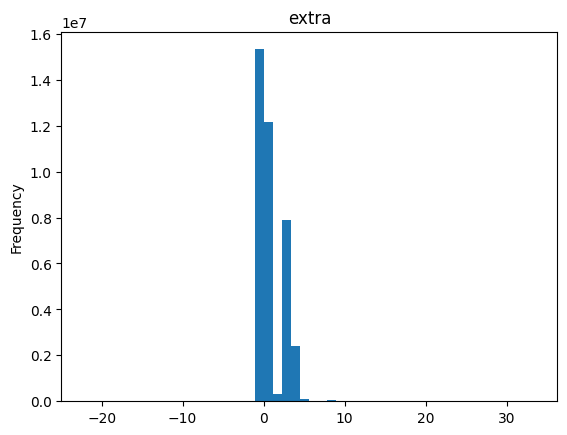

In [60]:
df["extra"].plot(kind="hist", title="extra", xlabel="extra", bins=50)

<AxesSubplot:>

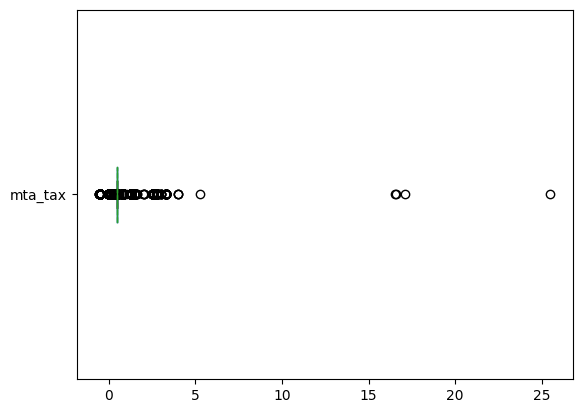

In [61]:
df.boxplot(column=["mta_tax"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["mta_tax"])

In [ ]:
df["mta_tax"].plot(kind="hist", title="mta_tax", xlabel="mta_tax", bins=50)

<AxesSubplot:>

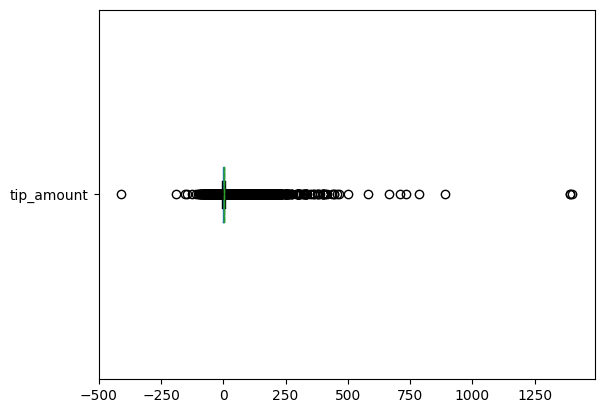

In [ ]:
df.boxplot(column=["tip_amount"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["Tip amount"])

<AxesSubplot:title={'center':'tip_amount'}, ylabel='Frequency'>

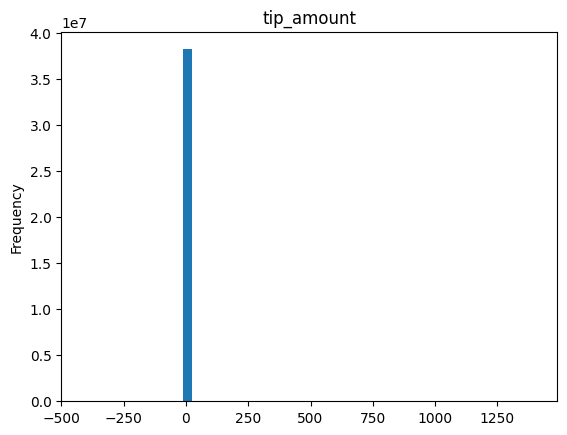

In [62]:
df["tip_amount"].plot(kind="hist", title="tip_amount", xlabel="tip_amount", bins=50)

<AxesSubplot:>

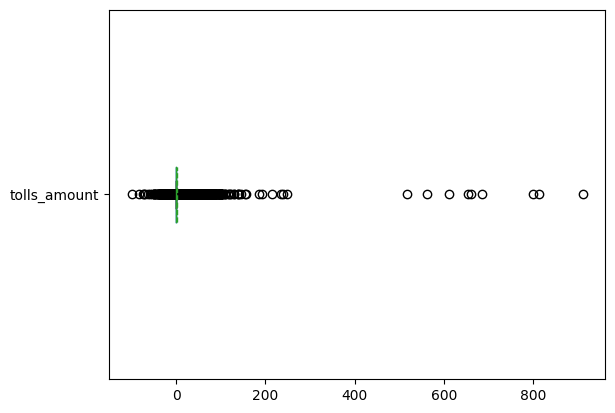

In [63]:
df.boxplot(column=["tolls_amount"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["tolls_amount"])

<AxesSubplot:title={'center':'tolls_amount'}, ylabel='Frequency'>

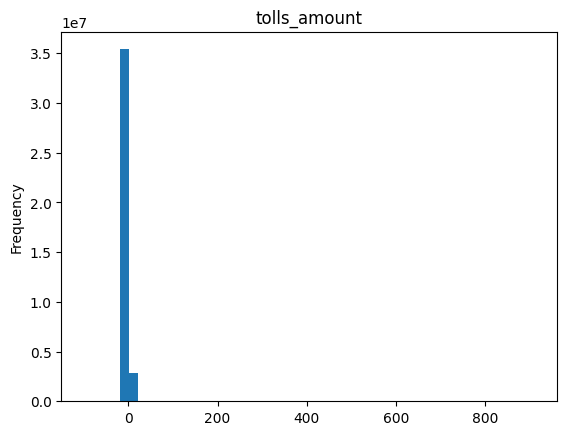

In [64]:
df["tolls_amount"].plot(kind="hist", title="tolls_amount", xlabel="tolls_amount", bins=50)

<AxesSubplot:>

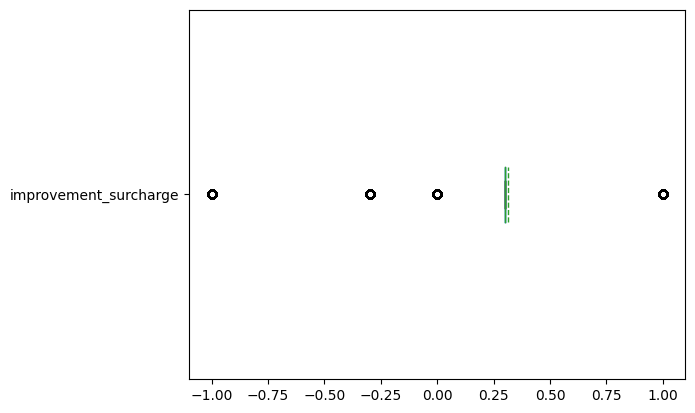

In [65]:
df.boxplot(column=["improvement_surcharge"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["improvement_surcharge"])

In [ ]:
df["improvement_surcharge"].plot(kind="hist", title="improvement_surcharge", xlabel="improvement_surcharge", bins=50)

<AxesSubplot:>

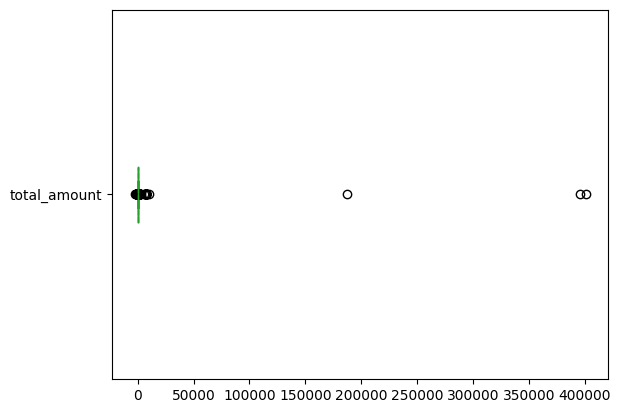

In [ ]:
df.boxplot(column=["total_amount"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["total_amount"])

<AxesSubplot:title={'center':'total_amount'}, ylabel='Frequency'>

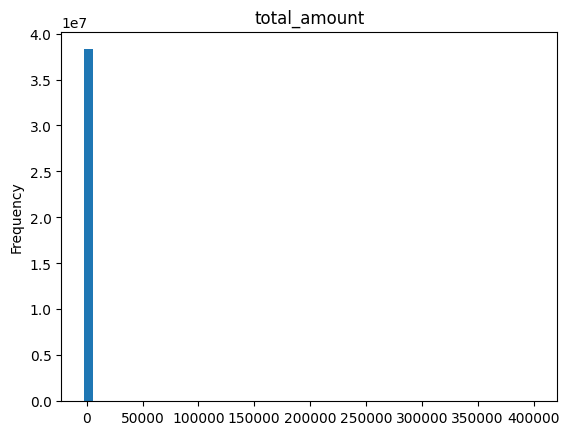

In [66]:
df["total_amount"].plot(kind="hist", title="total_amount", xlabel="total_amount", bins=50)

<AxesSubplot:>

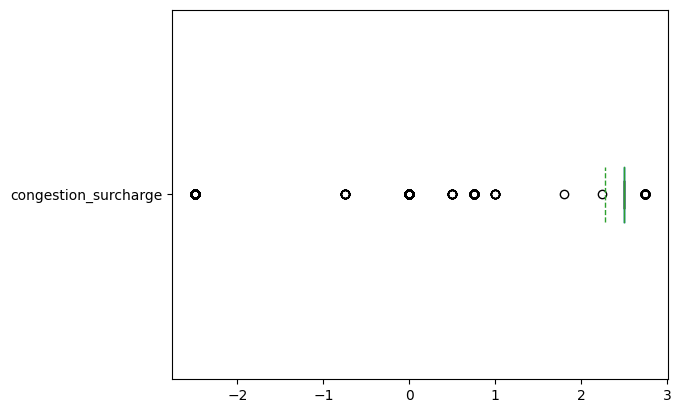

In [67]:
df.boxplot(column=["congestion_surcharge"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["congestion_surcharge"])

<AxesSubplot:title={'center':'congestion_surcharge'}, ylabel='Frequency'>

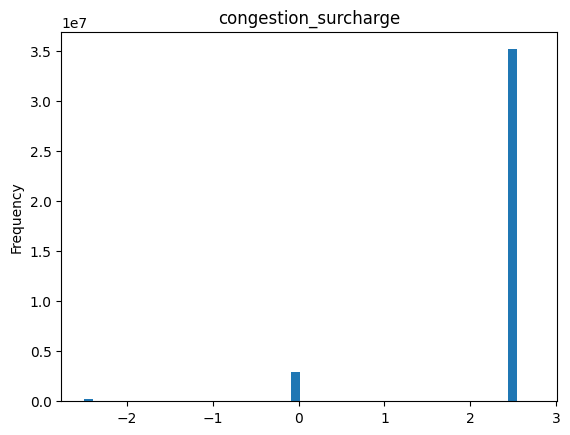

In [68]:
df["congestion_surcharge"].plot(kind="hist", title="congestion_surcharge", xlabel="congestion_surcharge", bins=50)

<AxesSubplot:>

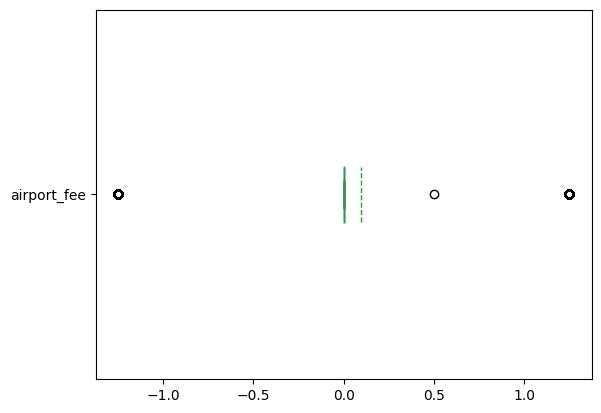

In [69]:
df.boxplot(column=["airport_fee"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["airport_fee"])

<AxesSubplot:title={'center':'airport_fee'}, ylabel='Frequency'>

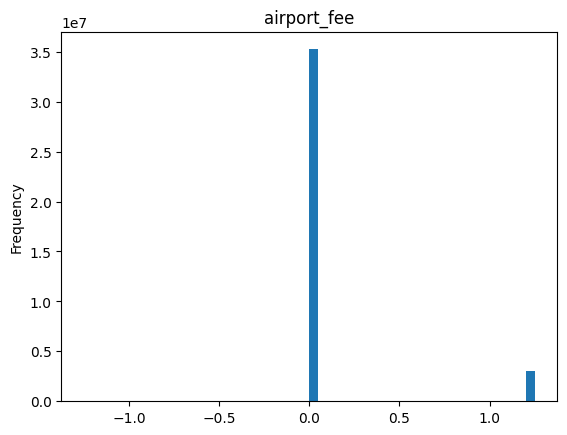

In [70]:
df["airport_fee"].plot(kind="hist", title="airport_fee", xlabel="airport_fee", bins=50)

In [5]:
def remove_outliers(df, attribute, min = None, max = None, include_min = True, include_max = True):
    if min is not None:
        if include_min:
            df = df[df[attribute]>=min]
        else:
            df = df[df[attribute]>min]
    if max is not None:
        if include_max:
            df = df[df[attribute]<=max]
        else:
            df = df[df[attribute]<max]
    return df

In [80]:
df = remove_outliers(df, "duration", min = 60, max = 10800)

<AxesSubplot:>

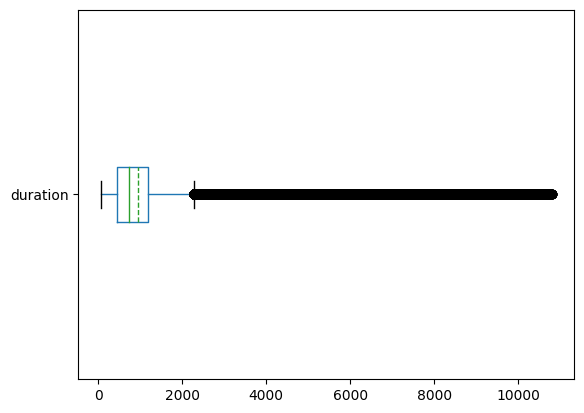

In [81]:
df.boxplot(column=["duration"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["duration"])

<AxesSubplot:title={'center':'duration'}, ylabel='Frequency'>

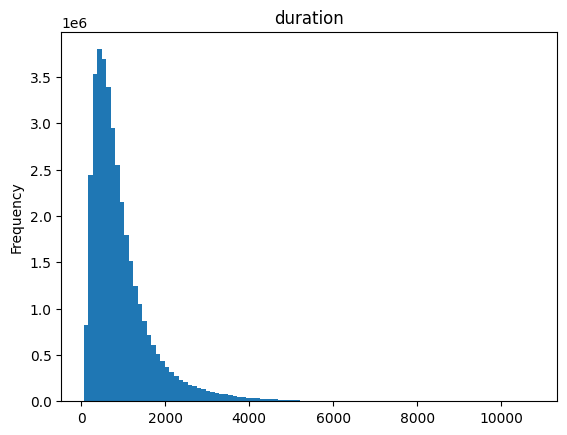

In [82]:
df["duration"].plot(kind="hist", title="duration", xlabel="duration", bins=100)

In [60]:
df = remove_outliers(df, "passenger_count", max = 7)

In [6]:
df = remove_outliers(df, "trip_distance", min = 0, max = 25000, include_min = False)

<AxesSubplot:>

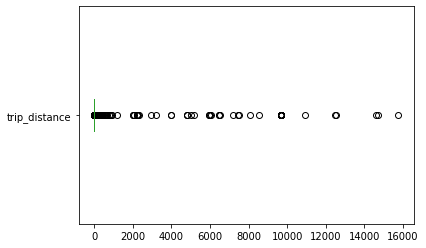

In [7]:
df.boxplot(column=["trip_distance"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["trip_distance"])

<AxesSubplot:title={'center':'trip_distance'}, ylabel='Frequency'>

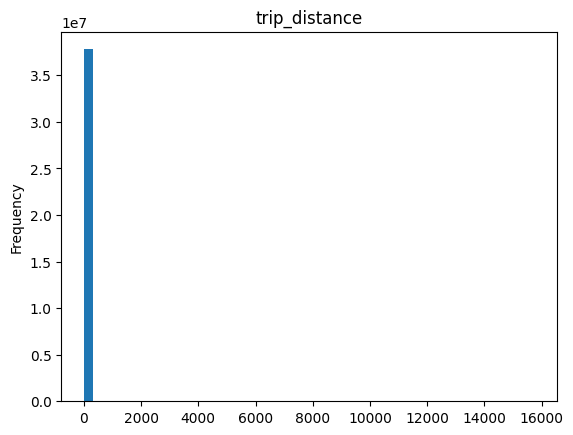

In [8]:
df["trip_distance"].plot(kind="hist", title="trip_distance", xlabel="trip_distance", bins=100)

In [9]:
df = remove_outliers(df, "trip_distance", min = 0, max = 1500, include_min = False)

<AxesSubplot:>

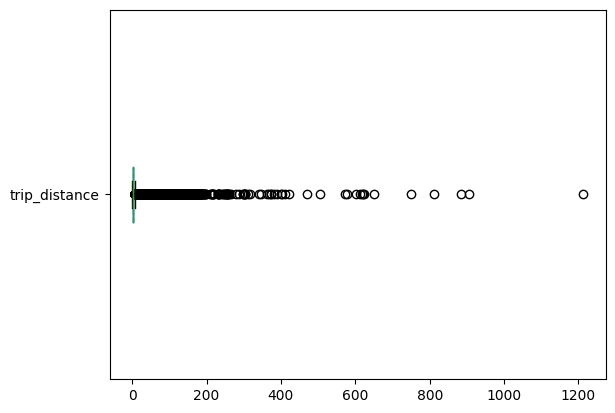

In [10]:
df.boxplot(column=["trip_distance"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["trip_distance"])

<AxesSubplot:title={'center':'trip_distance'}, ylabel='Frequency'>

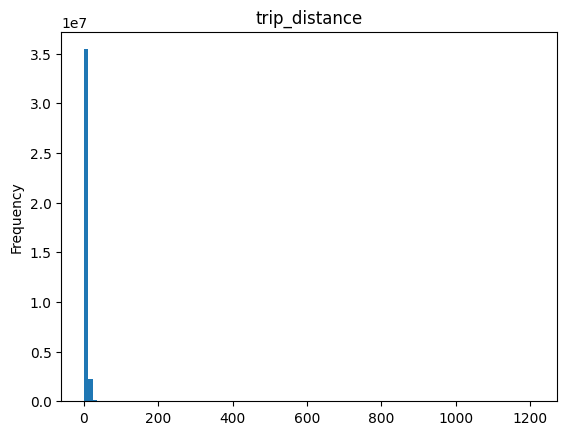

In [11]:
df["trip_distance"].plot(kind="hist", title="trip_distance", xlabel="trip_distance", bins=100)

In [12]:
df = remove_outliers(df, "trip_distance", min = 0, max = 100, include_min = False)

<AxesSubplot:>

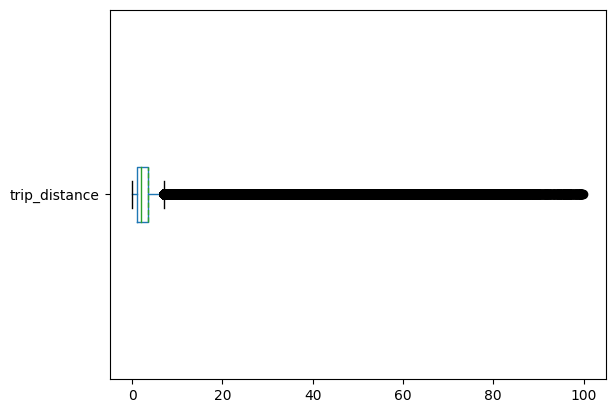

In [13]:
df.boxplot(column=["trip_distance"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["trip_distance"])

<AxesSubplot:title={'center':'trip_distance'}, ylabel='Frequency'>

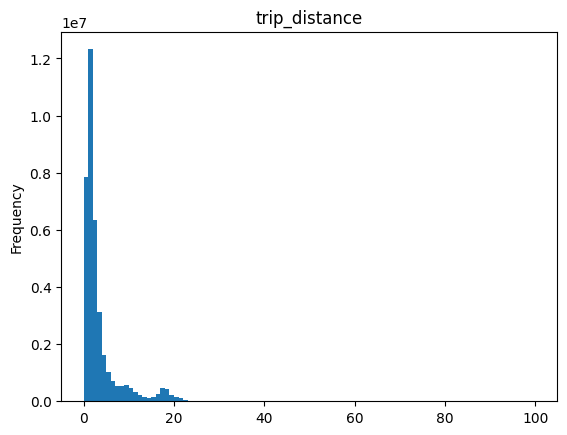

In [14]:
df["trip_distance"].plot(kind="hist", title="trip_distance", xlabel="trip_distance", bins=100)

In [15]:
df = remove_outliers(df, "trip_distance", min = 0, max = 50, include_min = False)

<AxesSubplot:>

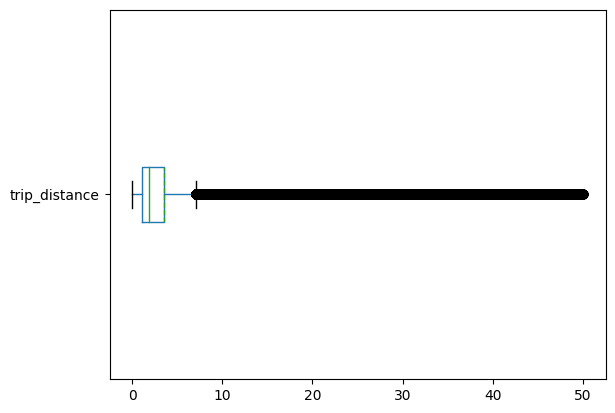

In [16]:
df.boxplot(column=["trip_distance"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["trip_distance"])

<AxesSubplot:title={'center':'trip_distance'}, ylabel='Frequency'>

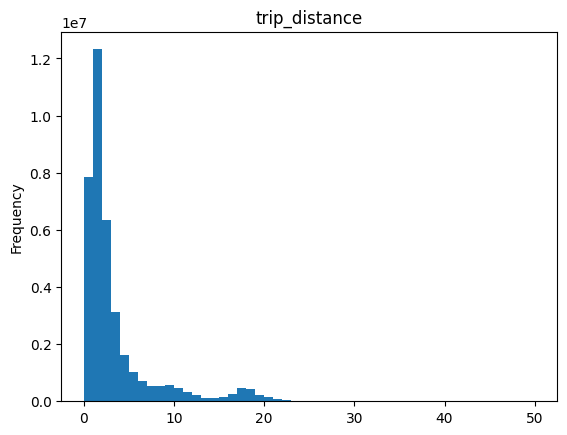

In [17]:
df["trip_distance"].plot(kind="hist", title="trip_distance", xlabel="trip_distance", bins=50)

In [18]:
df = remove_outliers(df, "RatecodeID", min = 0, max = 6)

In [20]:
df = remove_outliers(df, "payment_type", min = 1, max = 2)

In [21]:
df = remove_outliers(df, "fare_amount", min = 2.5, max = 50000, include_min = False)

<AxesSubplot:>

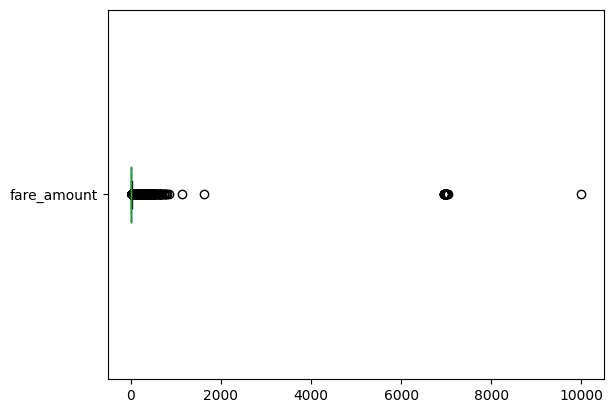

In [22]:
df.boxplot(column=["fare_amount"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["fare_amount"])

<AxesSubplot:title={'center':'fare_amount'}, ylabel='Frequency'>

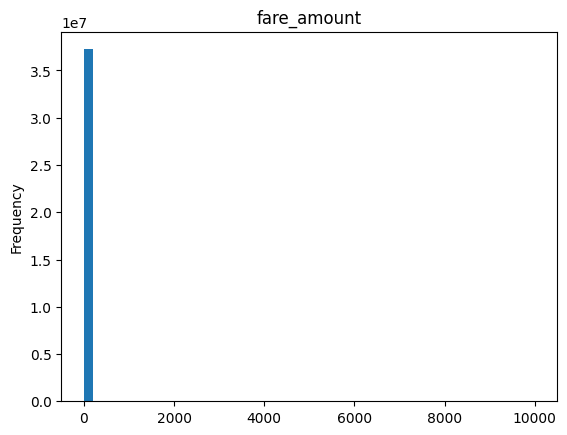

In [23]:
df["fare_amount"].plot(kind="hist", title="fare_amount", xlabel="fare_amount", bins=50)

In [24]:
df = remove_outliers(df, "fare_amount", min = 0, max = 2000, include_min = False)

<AxesSubplot:>

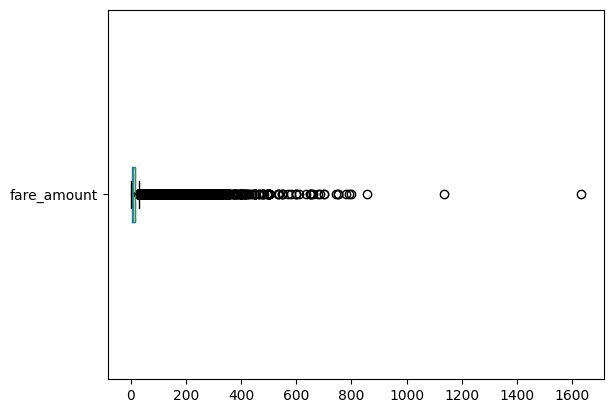

In [25]:
df.boxplot(column=["fare_amount"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["fare_amount"])

<AxesSubplot:title={'center':'fare_amount'}, ylabel='Frequency'>

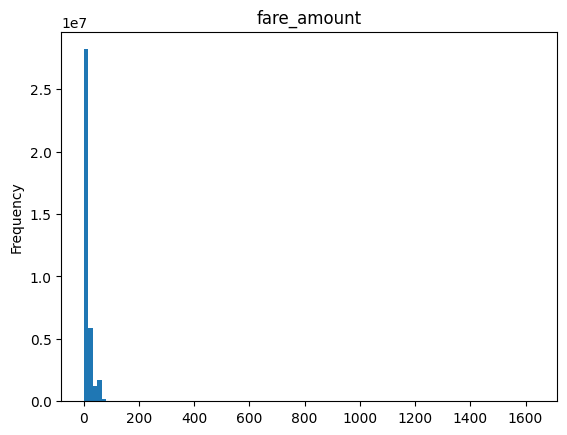

In [26]:
df["fare_amount"].plot(kind="hist", title="fare_amount", xlabel="fare_amount", bins=100)

In [61]:
df = remove_outliers(df, "fare_amount", min = 2.5, max = 250, include_min = False)

<AxesSubplot:>

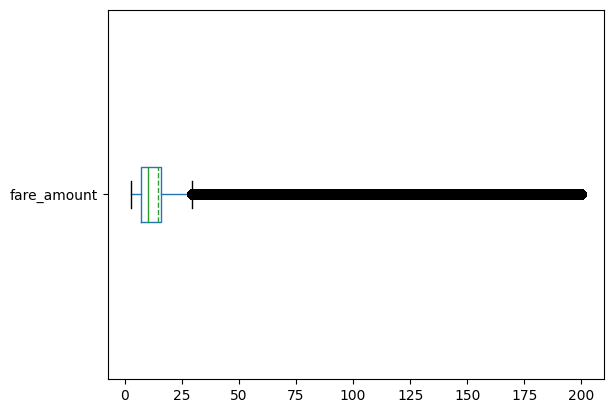

In [62]:
df.boxplot(column=["fare_amount"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["fare_amount"])

<AxesSubplot:title={'center':'fare_amount'}, ylabel='Frequency'>

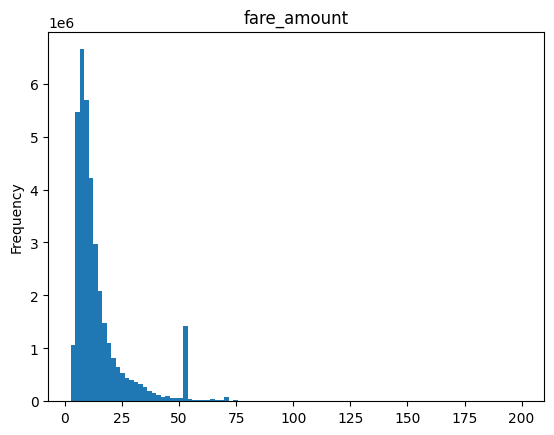

In [63]:
df["fare_amount"].plot(kind="hist", title="fare_amount", xlabel="fare_amount", bins=100)

In [30]:
df = remove_outliers(df, "extra", min = 0)

<AxesSubplot:>

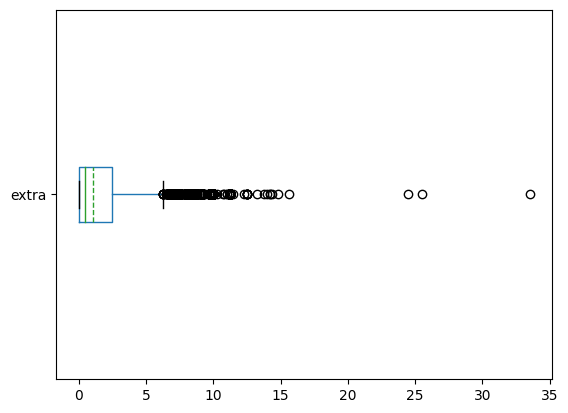

In [31]:
df.boxplot(column=["extra"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["extra"])

In [32]:
df = remove_outliers(df, "mta_tax", min = 0)

<AxesSubplot:>

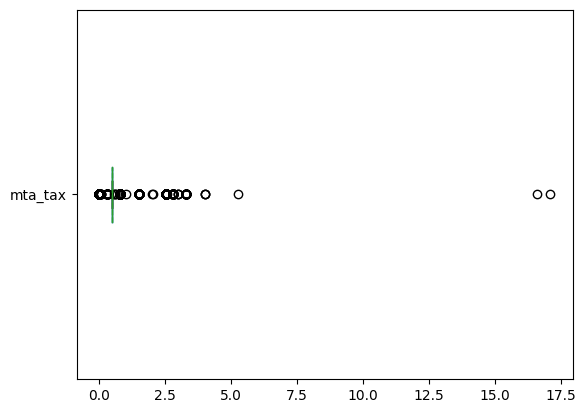

In [33]:
df.boxplot(column=["mta_tax"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["mta_tax"])

In [ ]:
df = remove_outliers(df, "tip_amount", min = 0, max = 1000)

<AxesSubplot:>

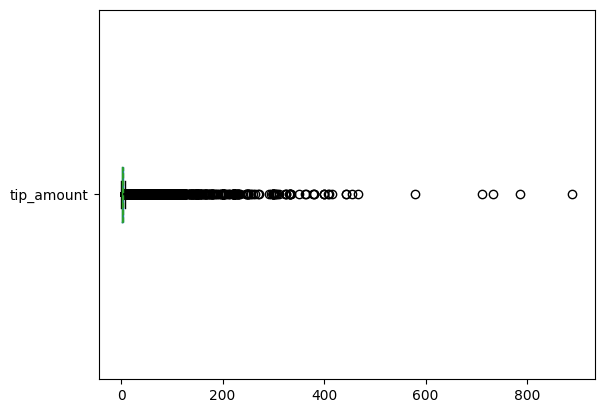

In [ ]:
df.boxplot(column=["tip_amount"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["tip_amount"])

<AxesSubplot:title={'center':'tip_amount'}, ylabel='Frequency'>

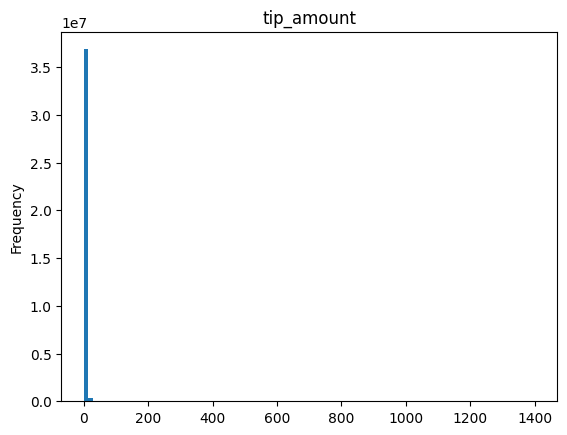

In [34]:
df["tip_amount"].plot(kind="hist", title="tip_amount", xlabel="tip_amount", bins=100)

In [53]:
df = remove_outliers(df, "tip_amount", min = 0, max = 125)

<AxesSubplot:>

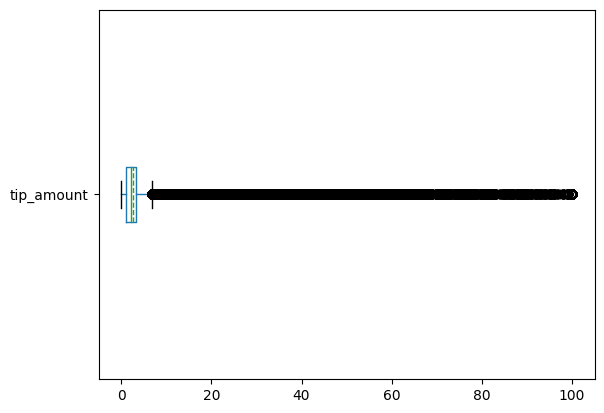

In [54]:
df.boxplot(column=["tip_amount"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["tip_amount"])

<AxesSubplot:title={'center':'tip_amount'}, ylabel='Frequency'>

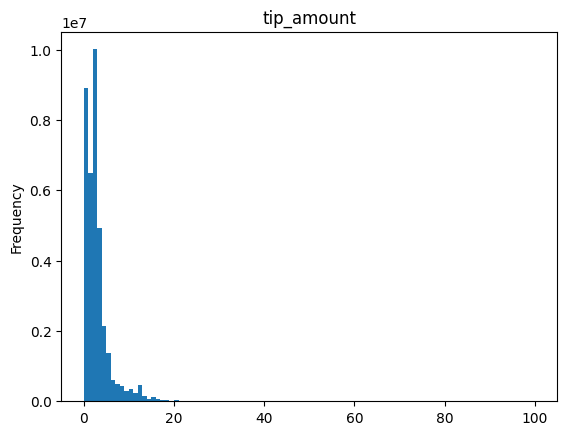

In [55]:
df["tip_amount"].plot(kind="hist", title="tip_amount", xlabel="tip_amount", bins=100)

In [48]:
df = remove_outliers(df, "tolls_amount", min = 0, max = 100)

<AxesSubplot:>

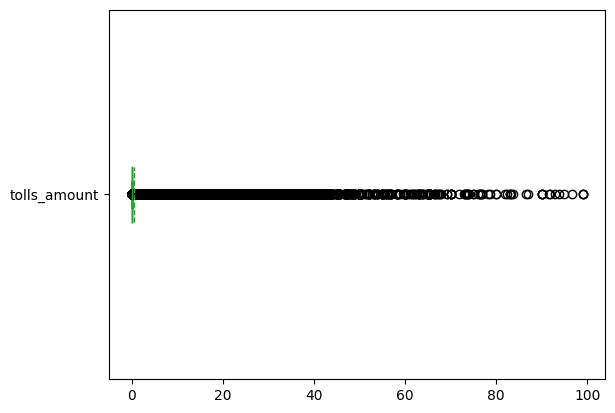

In [49]:
df.boxplot(column=["tolls_amount"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["tolls_amount"])

In [44]:
df = remove_outliers(df, "improvement_surcharge", min = 0)

In [45]:
df = remove_outliers(df, "total_amount", min = 0, max = 50000, include_min=False)

<AxesSubplot:>

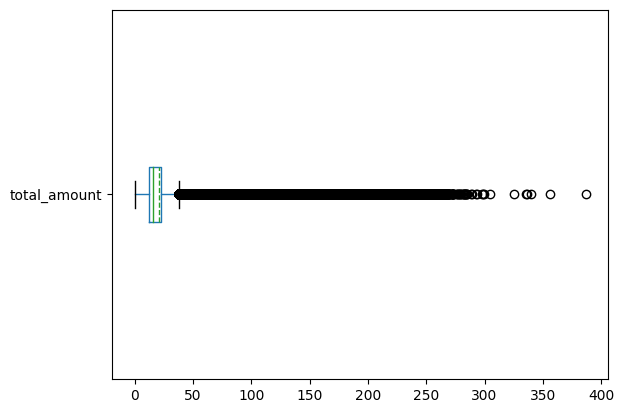

In [46]:
df.boxplot(column=["total_amount"], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=["total_amount"])

<AxesSubplot:title={'center':'total_amount'}, ylabel='Frequency'>

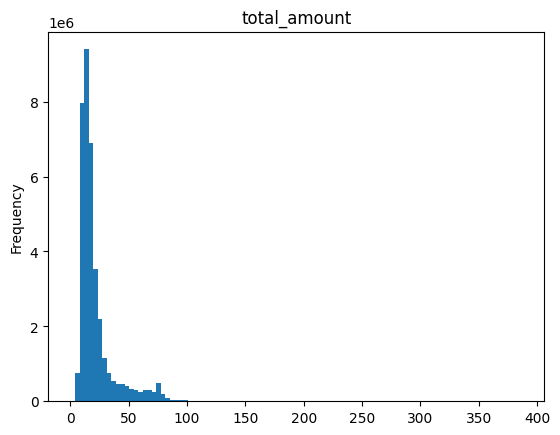

In [47]:
df["total_amount"].plot(kind="hist", title="total_amount", xlabel="total_amount", bins=100)

In [50]:
df = remove_outliers(df, "congestion_surcharge", min = 0)

In [51]:
df = remove_outliers(df, "airport_fee", min = 0)

In [56]:
df.shape

(37245204, 19)

trip_distance
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee


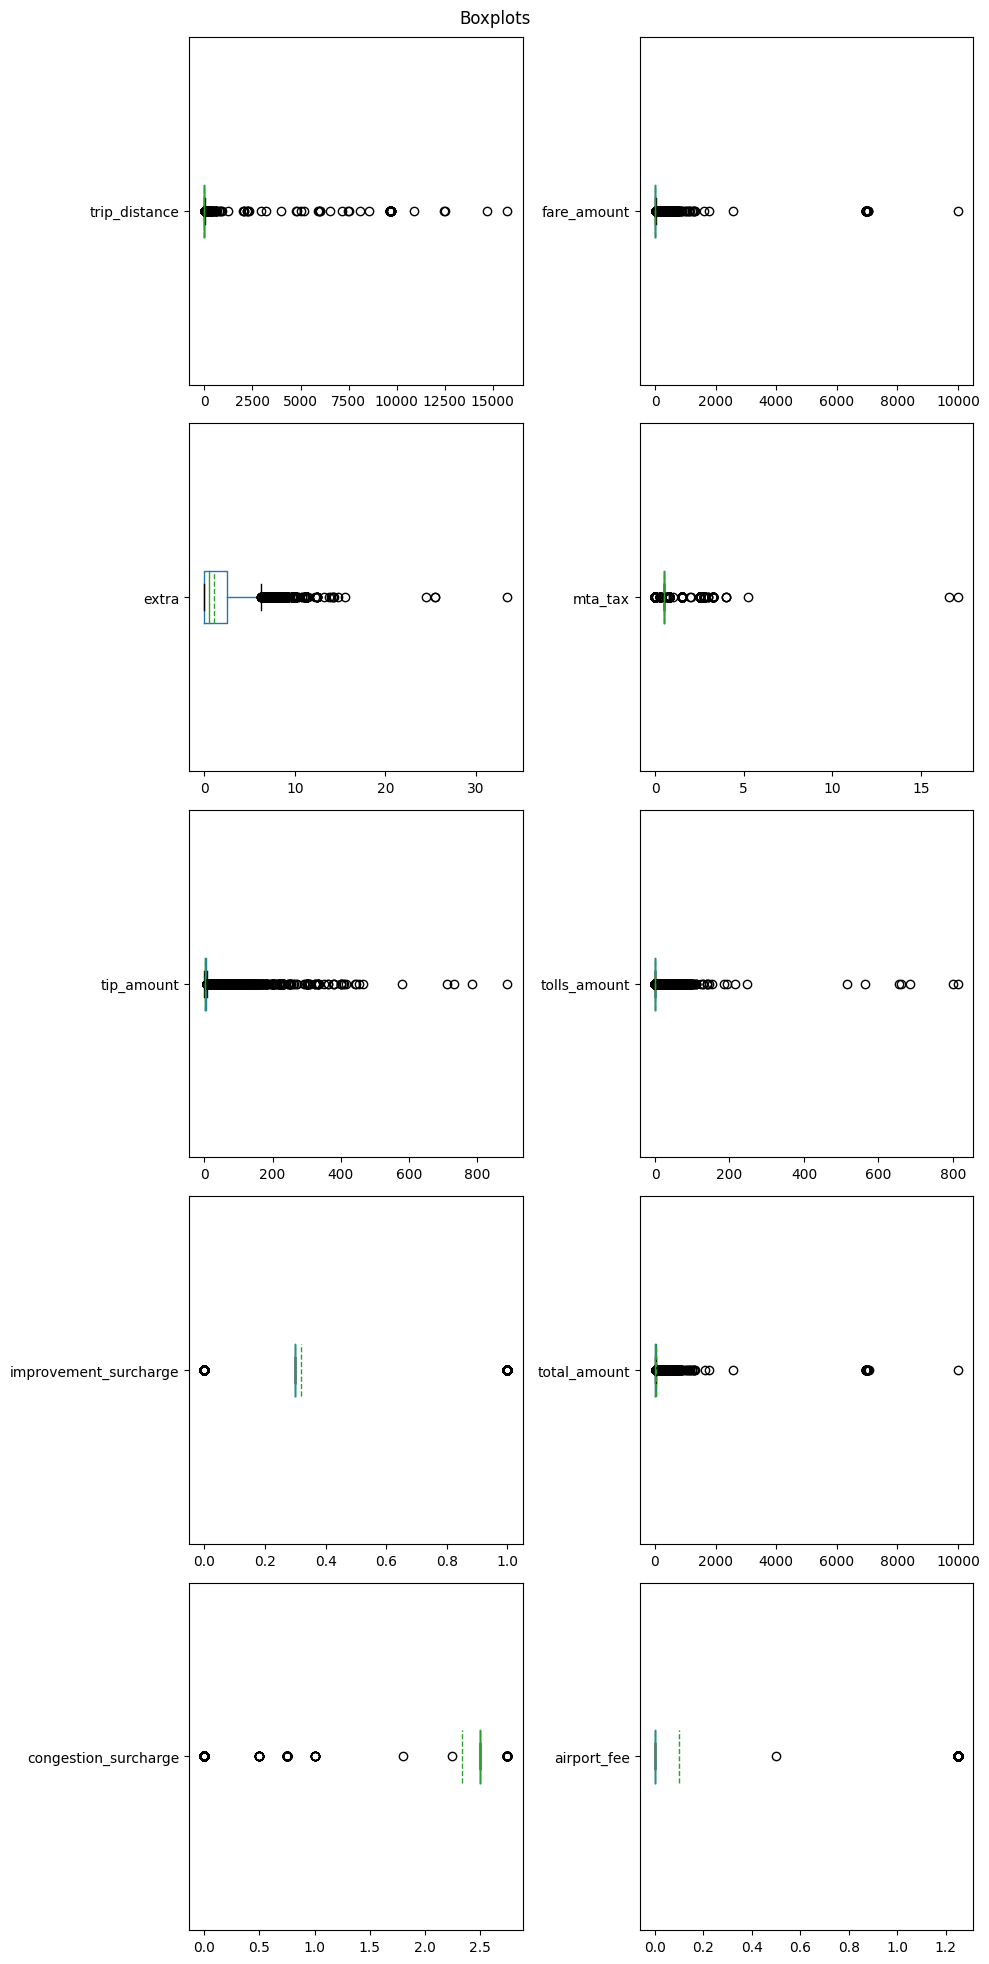

In [30]:
list = ['trip_distance', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee']
fig = plt.figure(figsize=(10,20))

for i, attribute in enumerate(list):
    print(attribute)
    ax = fig.add_subplot(5, 2, i + 1)
    df.boxplot(ax=ax, column=[attribute], grid=False, showfliers=True, showmeans=True, meanline=True, vert=False, labels=[attribute])

fig.suptitle('Boxplots')
fig.tight_layout(rect=[0, 0, 1, 0.99])

<AxesSubplot:title={'center':'Distance vs. fare'}, xlabel='Distance', ylabel='Fare'>

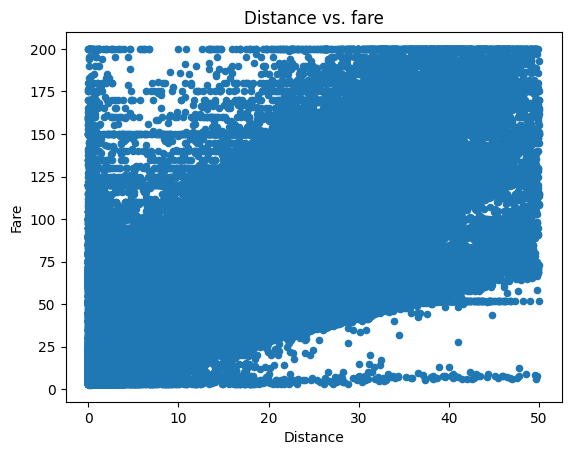

In [83]:
df.plot(kind="scatter", x="trip_distance", y="fare_amount", title="Distance vs. fare", xlabel="Distance", ylabel="Fare")

<AxesSubplot:title={'center':'Distance vs. total'}, xlabel='Distance', ylabel='Total'>

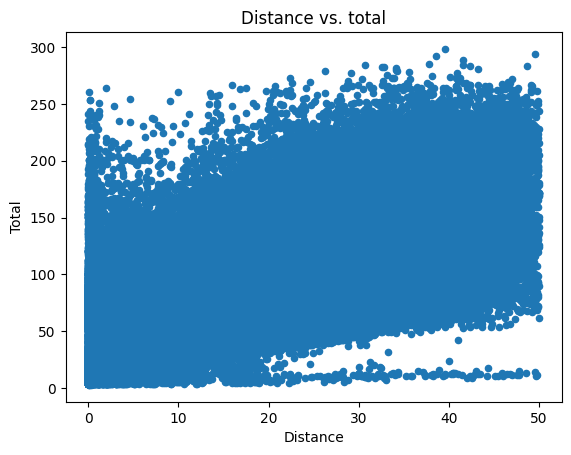

In [84]:
df.plot(kind="scatter", x="trip_distance", y="total_amount", title="Distance vs. total", xlabel="Distance", ylabel="Total")

<AxesSubplot:title={'center':'Distance vs. duration'}, xlabel='Distance', ylabel='duration'>

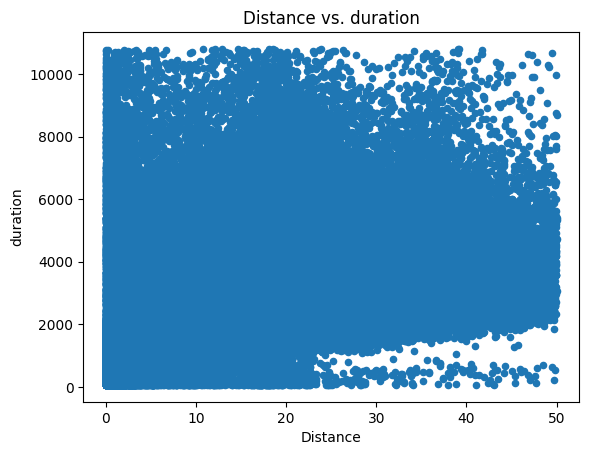

In [85]:
df.plot(kind="scatter", x="trip_distance", y="duration", title="Distance vs. duration", xlabel="Distance", ylabel="duration")

<AxesSubplot:title={'center':'Distance vs. duration'}, xlabel='Distance', ylabel='duration'>

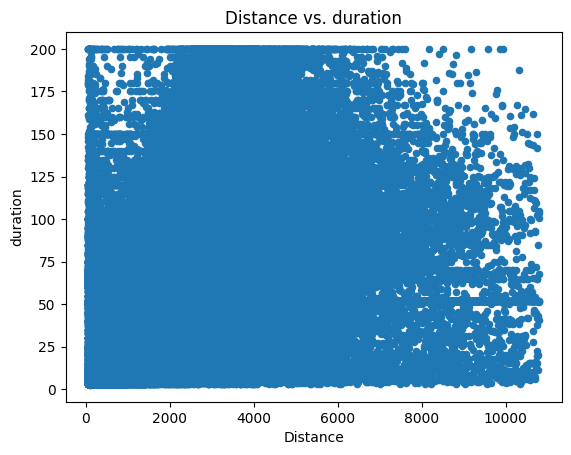

In [86]:
df.plot(kind="scatter", x="duration", y="fare_amount", title="Distance vs. duration", xlabel="duration", ylabel="distance")

<AxesSubplot:title={'center':'Distance vs. duration'}, xlabel='Distance', ylabel='duration'>

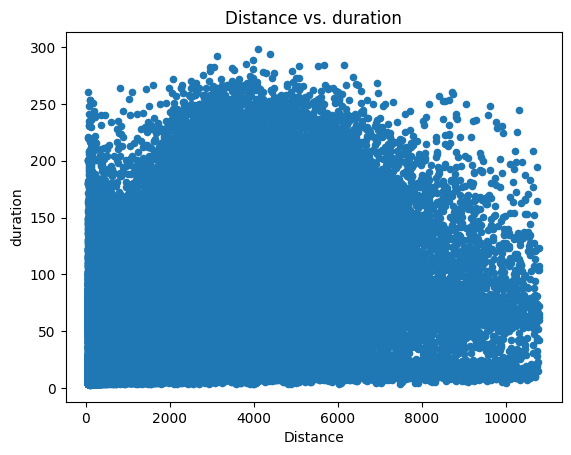

In [87]:
df.plot(kind="scatter", x="duration", y="total_amount", title="Distance vs. duration", xlabel="duration", ylabel="distance")

In [31]:
df.to_csv('data/yellow_tripdata_combined_cleaned.csv')